## The Battle of Neighborhoods - Week 2

### Coursera Capstone Project - Jack Carlin

In [1]:
import numpy as np 

import itertools as itt

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

import html

from geopy.geocoders import Nominatim

import requests 
from pandas.io.json import json_normalize 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

print('Libraries imported.')

Libraries imported.


In [2]:
london_data = pd.read_csv('london_boroughs.csv')
london_data.head()

,Borough,Area (sq mi),Population (2019),Latitude,Longitude
0,Barking and Dagenham,13.93,212906,51.54738,0.13583
1,Barnet,33.49,395896,51.62092,-0.20982
2,Bexley,23.38,248287,51.46028,0.14607
3,Brent,16.70,329771,51.55855,-0.26542
4,Bromley,57.97,332336,51.38482,0.05916


In [3]:
import html

coords = london_data[['Latitude', 'Longitude']]
coordslist = coords.values.tolist()


map = folium.Map(location=[51.5074, -0.1278], zoom_start=10)
for point in range(0, len(coordslist)):
    folium.Marker(coordslist[point], popup=html.escape(london_data['Borough'][point])).add_to(map)

map

In [4]:
CLIENT_ID = 'HSMWUAMDVYNIUWIC1BNAF00BGPJUYQXY25AOHTMBRNYTSBGR'
CLIENT_SECRET = 'F0IEPKJZBJC22ZVY4KWP4NBU0LUARXD5K4IOVK1QDJAM13NM'
VERSION = '20210106'
LIMIT = 100

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: HSMWUAMDVYNIUWIC1BNAF00BGPJUYQXY25AOHTMBRNYTSBGR
CLIENT_SECRET:F0IEPKJZBJC22ZVY4KWP4NBU0LUARXD5K4IOVK1QDJAM13NM


In [5]:
def getNearbyVenues(names, latitudes, longitudes, areas):
    
    venues_list=[]
    for name, lat, lng, area in zip(names, latitudes, longitudes, areas):
        print(name)
        radius = (1609.34)*np.sqrt(area/(np.pi))  
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [6]:
london_venues = getNearbyVenues(names=london_data['Borough'],
                                   latitudes=london_data['Latitude'],
                                   longitudes=london_data['Longitude'],
                                   areas=london_data['Area (sq mi)'] 
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston-upon-Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond-upon-Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [90]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add borough column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move borough column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Canal Lock,Caribbean Restaurant,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dam,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Health Food Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mini Golf,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Noodle House,Observatory,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outlet Mall,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Restaurant,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Windmill,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [91]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped.head()

,Borough,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Canal Lock,Caribbean Restaurant,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dam,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Health Food Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mini Golf,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Noodle House,Observatory,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outlet Mall,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Restaurant,Roof Deck,Rugby Pitch,Rugby Stadium,Sake Bar,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Street Art,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Windmill,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Barking and Dagenham,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,

In [92]:
num_top_venues = 5

for borough in london_grouped['Borough']:
    print("----"+borough+"----")
    temp = london_grouped[london_grouped['Borough'] == borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0         Grocery Store  0.14
1           Supermarket  0.11
2  Fast Food Restaurant  0.06
3                  Park  0.06
4                   Pub  0.06


----Barnet----
                venue  freq
0                Café  0.09
1         Coffee Shop  0.06
2                 Pub  0.06
3       Grocery Store  0.05
4  Turkish Restaurant  0.05


----Bexley----
                venue  freq
0                 Pub  0.15
1         Coffee Shop  0.08
2       Grocery Store  0.08
3                Park  0.08
4  Italian Restaurant  0.06


----Brent----
               venue  freq
0        Coffee Shop  0.08
1  Indian Restaurant  0.08
2               Park  0.04
3              Hotel  0.04
4               Café  0.04


----Bromley----
                  venue  freq
0           Coffee Shop  0.10
1                  Park  0.09
2                   Pub  0.08
3  Gym / Fitness Center  0.05
4           Pizza Place  0.03


----Camden----
         venue  freq
0      

In [93]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [94]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

districts_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Grocery Store,Supermarket,Pub,Fast Food Restaurant,Park,Train Station,Electronics Store,Discount Store,Pizza Place,Gas Station
1,Barnet,Café,Coffee Shop,Pub,Turkish Restaurant,Park,Grocery Store,Indian Restaurant,Italian Restaurant,Gym / Fitness Center,Bakery
2,Bexley,Pub,Coffee Shop,Grocery Store,Park,Supermarket,Italian Restaurant,Furniture / Home Store,Clothing Store,Pharmacy,Construction & Landscaping
3,Brent,Coffee Shop,Indian Restaurant,Gym / Fitness Center,Hotel,Park,Café,Clothing Store,Grocery Store,Pub,Portuguese Restaurant
4,Bromley,Coffee Shop,Park,Pub,Gym / Fitness Center,Italian Restaurant,Gastropub,Grocery Store,Mediterranean Restaurant,Portuguese Restaurant,Pizza Place


In [95]:
# set number of clusters
kclusters = 6

london_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# add clustering labels
districts_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [96]:
london_merged = london_data

# merge london_grouped with london_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(districts_venues_sorted.set_index('Borough'), on='Borough')

london_merged # check the last columns!
london_merged.dropna(inplace=True)
london_merged.reset_index(drop=True, inplace=True)

In [97]:
# create map
map_clusters = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
london_venues['Venue Category'].unique()[246][-10:]

'Restaurant'

In [38]:
restaurants = []
for i in range(len(london_venues['Venue Category'].unique())):
    if london_venues['Venue Category'].unique()[i][-10:] == 'Restaurant':
        restaurants.append(london_venues['Venue Category'].unique()[i])
    else:
        pass

In [48]:
cuisines = restaurants[0:3]+restaurants[5:24]+restaurants[25:40]+restaurants[43:51]+restaurants[52:56]+restaurants[57:63]

In [51]:
rank = london_venues['Venue Category'].value_counts(ascending=False)

In [52]:
cuisine_count = rank[cuisines]

pandas.core.series.Series

In [61]:
cuisine_count.sort_values(ascending=False, inplace=True)

In [63]:
for i in range(len(cuisine_count)):
    cuisine_count.replace(i, )

54

In [72]:
#cuisine_count.index[40][:-11]

cuisine_graph = []
for i in range(len(cuisine_count)):
    cuisine_graph.append(cuisine_count.index[i][:-11])

In [78]:
cuisine_count.index = cuisine_graph

In [79]:
cuisine_count

Indian              84
Italian             67
Turkish             43
French              30
Portuguese          29
Middle Eastern      26
Mediterranean       25
Thai                23
Chinese             17
Greek               16
Sushi               14
Korean              14
Japanese            13
Asian               13
Tapas               12
Vietnamese           9
English              8
Lebanese             7
Modern European      7
American             6
Ethiopian            6
Pakistani            5
Persian              5
Spanish              5
Falafel              4
German               4
Argentinian          4
Caribbean            3
Kebab                3
Brazilian            3
Eastern European     2
African              2
Sri Lankan           2
Afghan               2
South American       2
Malay                2
Latin American       2
Doner                2
Ramen                2
Halal                2
Mexican              2
South Indian         2
Okonomiyaki          1
Peruvian   

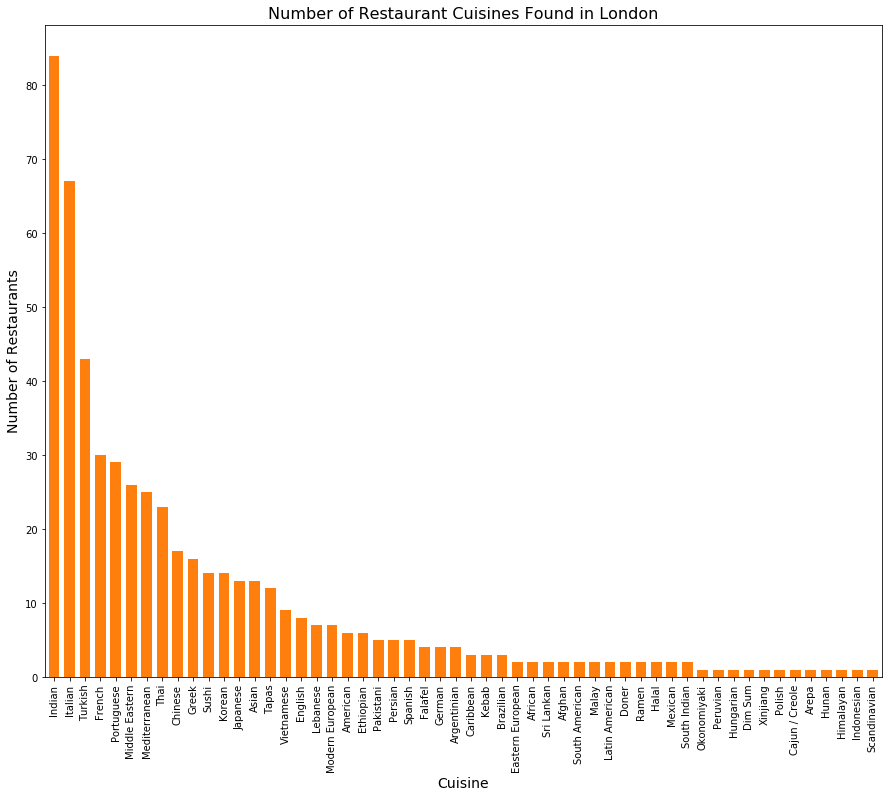

In [89]:
ax = cuisine_count.plot(kind='bar', width = 0.7, figsize=(15,12), color='tab:orange')
ax.set_title('Number of Restaurant Cuisines Found in London', fontsize=16)
ax.set_xlabel('Cuisine', fontsize=14)
ax.set_ylabel('Number of Restaurants', fontsize=14)
plt.savefig('cuisine_bar.png', facecolor='w', transparent=False, bbox_inches='tight')

In [110]:
london_merged.loc[london_merged['Cluster Labels'] == 0]

,Borough,Area (sq mi),Population (2019),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,33.49,395896,51.62092,-0.20982,0,Café,Coffee Shop,Pub,Turkish Restaurant,Park,Grocery Store,Indian Restaurant,Italian Restaurant,Gym / Fitness Center,Bakery
8,Enfield,31.74,333794,51.64628,-0.07991,0,Turkish Restaurant,Coffee Shop,Pub,Greek Restaurant,Café,Park,Garden Center,Supermarket,Gym / Fitness Center,Fish & Chips Shop
12,Haringey,11.42,268647,51.59059,-0.10654,0,Café,Turkish Restaurant,Coffee Shop,Park,Pub,Pizza Place,Bakery,Trail,Greek Restaurant,Mediterranean Restaurant
